# Automated - L3 processing OMG Narwhals data - averaging and merging mooring data

## // automated version

---

In [10]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import string
import numpy as np
import pandas as pd
import csv
import glob, os
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
import xarray as xr
import netCDF4 as nc4
from statistics import mode
import omgL3_funs

## metadata

In [12]:
## 2019 mooring data

## SBE37 ------------------------------------------

## get all metadata associated with each data file
# read in csv with metadata
metafile_sbe37 = Path("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/2019/SBE37_metadata_2019.csv")
metafile_sbe37 = pd.read_csv(metafile_sbe37)
# metafile_sbe37

Rink_meta_sbe37 = metafile_sbe37.loc[metafile_sbe37.loc[:,"glacier_front"] == "Rink glacier",:]
KO_meta_sbe37 = metafile_sbe37.loc[metafile_sbe37.loc[:,"glacier_front"] == "Kong Oscar glacier",:]
Sverdrup_meta_sbe37 = metafile_sbe37.loc[metafile_sbe37.loc[:,"glacier_front"] == "Sverdrup glacier",:]

## directory for mooring L2 datasets
mooring_L2_dir = 'C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2019'

## SBE56 ------------------------------------------

metafile_sbe56 = Path("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/2019/SBE56_metadata_2019.csv")
metafile_sbe56 = pd.read_csv(metafile_sbe56)
# metafile_sbe56

Rink_meta_sbe56 = metafile_sbe56.loc[metafile_sbe56.loc[:,"glacier_front"] == "Rink glacier",:]
KO_meta_sbe56 = metafile_sbe56.loc[metafile_sbe56.loc[:,"glacier_front"] == "Kong Oscar glacier",:]
Sverdrup_meta_sbe56 = metafile_sbe56.loc[metafile_sbe56.loc[:,"glacier_front"] == "Sverdrup glacier",:]

## directory for sbe56 datasets
mooring_sbe56_dir = "C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L1/2019/SBE56"

In [3]:
## 2020 mooring data

## SBE37 ------------------------------------------

## get all metadata associated with each data file
# read in csv with metadata
metafile_sbe37 = Path("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/2020/SBE37_metadata_2020.csv")
metafile_sbe37 = pd.read_csv(metafile_sbe37)
# metafile_sbe37

Fisher_meta_sbe37 = metafile_sbe37.loc[metafile_sbe37.loc[:,"glacier_front"] == "Fisher Islands",:]
KO_meta_sbe37 = metafile_sbe37.loc[metafile_sbe37.loc[:,"glacier_front"] == "Kong Oscar glacier",:]

## directory for mooring L2 datasets
mooring_L2_dir = 'C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L2/2020'

## SBE56 ------------------------------------------

metafile_sbe56 = Path("/Users/marie/Documents/PhD/Chapter_3/OMG_Python_dir/metadata/2020/SBE56_metadata_2020.csv")
metafile_sbe56 = pd.read_csv(metafile_sbe56)
# metafile_sbe56

Fisher_meta_sbe56 = metafile_sbe56.loc[metafile_sbe56.loc[:,"glacier_front"] == "Fisher Islands",:]
KO_meta_sbe56 = metafile_sbe56.loc[metafile_sbe56.loc[:,"glacier_front"] == "Kong Oscar glacier",:]

## directory for sbe56 datasets
mooring_sbe56_dir = "C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L1/2020/SBE56"


# Daily averaging 2019

## SBE37 2019

In [13]:
avg_length = '1D'

## daily averaging for datasets
filenames_rink = Rink_meta_sbe37['filename_L2']
sbe37_1_ds_1d_rink = omgL3_funs.sbe37_avg(filenames_rink.iloc[0], mooring_L2_dir, avg_length)
sbe37_2_ds_1d_rink = omgL3_funs.sbe37_avg(filenames_rink.iloc[1], mooring_L2_dir, avg_length)

filenames_KO = KO_meta_sbe37['filename_L2']
sbe37_1_ds_1d_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[0], mooring_L2_dir, avg_length)
sbe37_2_ds_1d_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[1], mooring_L2_dir, avg_length)

filenames_sverdrup = Sverdrup_meta_sbe37['filename_L2']
sbe37_1_ds_1d_sverdrup = omgL3_funs.sbe37_avg(filenames_sverdrup.iloc[0], mooring_L2_dir, avg_length)
sbe37_2_ds_1d_sverdrup = omgL3_funs.sbe37_avg(filenames_sverdrup.iloc[1], mooring_L2_dir, avg_length)

In [5]:
# truncate 2019 data
sbe37_1_ds_rink = sbe37_1_ds_1d_rink.sel(time=slice("2018-08-26","2019-08-04"))
sbe37_2_ds_rink = sbe37_2_ds_1d_rink.sel(time=slice("2018-08-26","2019-08-04"))

sbe37_1_ds_KO = sbe37_1_ds_1d_KO.sel(time=slice("2018-08-25","2019-08-03"))
sbe37_2_ds_KO = sbe37_2_ds_1d_KO.sel(time=slice("2018-08-25","2019-08-03"))

sbe37_1_ds_sverdrup = sbe37_1_ds_1d_sverdrup.sel(time=slice("2018-08-24","2019-08-02"))
sbe37_2_ds_sverdrup = sbe37_2_ds_1d_sverdrup.sel(time=slice("2018-08-24","2019-08-02"))

In [ ]:
# truncate 2019 data for one day after deployment date and one day before recovery
# sbe37_1_ds_rink = sbe37_1_ds_1d_rink.sel(time=slice("2018-08-28","2019-08-03"))
# sbe37_2_ds_rink = sbe37_2_ds_1d_rink.sel(time=slice("2018-08-28","2019-08-03"))

# sbe37_1_ds_KO = sbe37_1_ds_1d_KO.sel(time=slice("2018-08-25","2019-08-03"))
# sbe37_2_ds_KO = sbe37_2_ds_1d_KO.sel(time=slice("2018-08-25","2019-08-03"))

# sbe37_1_ds_sverdrup = sbe37_1_ds_1d_sverdrup.sel(time=slice("2018-08-23","2019-08-02"))
# sbe37_2_ds_sverdrup = sbe37_2_ds_1d_sverdrup.sel(time=slice("2018-08-23","2019-08-02"))

In [ ]:
# sanity check plot
sbe37_1_ds_1d_rink.potential_temperature.plot();plt.grid()

In [ ]:
# double check new xarray dataset is organized properly
with xr.set_options(display_style="html"):
    display(sbe37_1_ds_1d_rink)

## SBE56 2019

### Rink

In [8]:
sbe56_1_ds

<xarray.Dataset>
Dimensions:      (time: 317)
Coordinates:
  * time         (time) datetime64[ns] 2018-08-28 2018-08-29 ... 2019-07-10
Data variables:
    temperature  (time) float64 -0.6347 -0.5937 -0.5629 ... -0.1098 -0.1167
    flag         (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/42)
    title:                  OMG Narwhal mooring temperature logger Level 3 Data
    summary:                This dataset contains temperature measurements fr...
    keywords:               Water Temperature
    keywords_vocabulary:    NASA Global Change Master Directory (GCMD) Scienc...
    id:                     OMG_Narwhals_Mooring_temp_L1
    uuid:                   906a0700-14dd-11ec-82a8-0242ac130003
    ...                     ...
    contributor_role:       OMG Narwhals Science Team performed mooring deplo...
    publisher_name:         Physical Oceanography Distributed Active Archive ...
    publisher_institution:  PO.DAAC
    publisher_email:        podaac@podaac.jpl.nasa.gov
    publisher_url:          https://podaac.jpl.nasa.gov/
    publisher_type:         group

In [6]:
avg_length = '1D'
# truncate = slice("2018-08-28","2019-08-03")
truncate = slice("2018-08-26","2019-08-04")

filenames = Rink_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2019080503716788.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_7_ds = omgL3_funs.sbe56_avg(filenames.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_8_ds = omgL3_funs.sbe56_avg(filenames.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

length of raw sbe56 data:  1378080
length of sbe56 data with flagged data removed:  1366380
number of sbe56 observations removed:  11700
length of raw sbe37 data:  165351
length of sbe37 data with flagged data removed:  163679
number of sbe37 observations removed:  1672
length of raw sbe56 data:  1490358
length of sbe56 data with flagged data removed:  1473621
number of sbe56 observations removed:  16737
length of raw sbe37 data:  165351
length of sbe37 data with flagged data removed:  163679
number of sbe37 observations removed:  1672
length of raw sbe56 data:  1490400
length of sbe56 data with flagged data removed:  1473660
number of sbe56 observations removed:  16740
length of raw sbe37 data:  165351
length of sbe37 data with flagged data removed:  163679
number of sbe37 observations removed:  1672
length of raw sbe56 data:  1490400
length of sbe56 data with flagged data removed:  1473660
number of sbe56 observations removed:  16740
length of raw sbe37 data:  165351
length of sbe37 

In [7]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature),
           len(sbe56_7_ds.temperature), len(sbe56_8_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

[317 342 342 342 342 342 342 342]
Time dimension is unequal among datasets.


### Kong Oscar

In [ ]:
avg_length = '1D'
truncate = slice("2018-08-25","2019-08-03")

filenames = KO_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2019080403716754.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [ ]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

### Sverdrup

In [ ]:
avg_length = '1D'
truncate = slice("2018-08-24","2019-08-02")

filenames = Sverdrup_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2019080303716787.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_7_ds = omgL3_funs.sbe56_avg(filenames.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [ ]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature), 
            len(sbe56_7_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

In [ ]:
# check dataset
sbe56_1_ds_1d

# Daily averaging 2020

## SBE37 2020

In [4]:
avg_length = '1D'

## daily averaging for datasets
filenames_Fisher = Fisher_meta_sbe37['filename_L2']
sbe37_1_ds_1d_Fisher = omgL3_funs.sbe37_avg(filenames_Fisher.iloc[0], mooring_L2_dir, avg_length)
sbe37_2_ds_1d_Fisher = omgL3_funs.sbe37_avg(filenames_Fisher.iloc[1], mooring_L2_dir, avg_length)

filenames_KO = KO_meta_sbe37['filename_L2']
sbe37_1_ds_1d_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[0], mooring_L2_dir, avg_length)
sbe37_2_ds_1d_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[1], mooring_L2_dir, avg_length)

In [5]:
# truncate 2020 data
sbe37_1_ds_Fisher = sbe37_1_ds_1d_Fisher.sel(time=slice("2019-08-05","2020-08-10"))
sbe37_2_ds_Fisher = sbe37_2_ds_1d_Fisher.sel(time=slice("2019-08-05","2020-08-10"))

sbe37_1_ds_KO = sbe37_1_ds_1d_KO.sel(time=slice("2019-08-04","2020-08-09"))
sbe37_2_ds_KO = sbe37_2_ds_1d_KO.sel(time=slice("2019-08-04","2020-08-09"))

In [ ]:
# # truncate 2020 data for one day after deployment date and one day before recovery
# sbe37_1_ds_Fisher = sbe37_1_ds_1d_Fisher.sel(time=slice("2019-08-06","2020-08-10"))
# sbe37_2_ds_Fisher = sbe37_2_ds_1d_Fisher.sel(time=slice("2019-08-06","2020-08-10"))

# sbe37_1_ds_KO = sbe37_1_ds_1d_KO.sel(time=slice("2019-08-05","2020-08-09"))
# sbe37_2_ds_KO = sbe37_2_ds_1d_KO.sel(time=slice("2019-08-05","2020-08-09"))

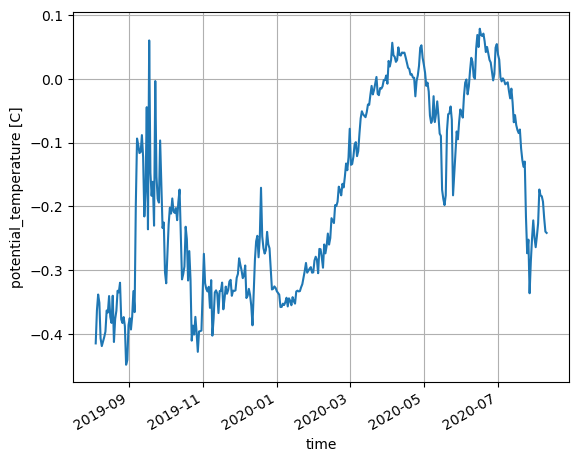

In [6]:
# sanity check plot
sbe37_1_ds_1d_Fisher.potential_temperature.plot();plt.grid()

In [ ]:
# double check new xarray dataset is organized properly
with xr.set_options(display_style="html"):
    display(sbe37_1_ds_1d_Fisher)

## SBE56 2020

### Fisher

In [ ]:
avg_length = '1D'
truncate = slice("2019-08-05","2020-08-10")

filenames = Fisher_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2020080603716754.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_7_ds = omgL3_funs.sbe56_avg(filenames.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_8_ds = omgL3_funs.sbe56_avg(filenames.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [9]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature), 
            len(sbe56_7_ds.temperature), len(sbe56_8_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

[372 372 372 372 372 372 372 371]
Time dimension is unequal among datasets.


### Kong Oscar

In [20]:
avg_length = '1D'
truncate = slice("2019-08-04","2020-08-09")

filenames = KO_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2020080603716787.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

length of raw sbe56 data:  1606320
length of sbe56 data with flagged data removed:  1605240
number of sbe56 observations removed:  1080
length of raw sbe37 data:  178480
length of sbe37 data with flagged data removed:  178448
number of sbe37 observations removed:  32
length of raw sbe56 data:  1606320
length of sbe56 data with flagged data removed:  1605240
number of sbe56 observations removed:  1080
length of raw sbe37 data:  178480
length of sbe37 data with flagged data removed:  178448
number of sbe37 observations removed:  32
length of raw sbe56 data:  1606320
length of sbe56 data with flagged data removed:  1605240
number of sbe56 observations removed:  1080
length of raw sbe37 data:  178480
length of sbe37 data with flagged data removed:  178448
number of sbe37 observations removed:  32
length of raw sbe56 data:  1606320
length of sbe56 data with flagged data removed:  1605240
number of sbe56 observations removed:  1080
length of raw sbe37 data:  178480
length of sbe37 data with 

In [21]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

[372 372 372 372 372 372]
Time dimension is equal among datasets.


In [ ]:
# check dataset
sbe56_1_ds_1d

# Hourly averaging 2019

## SBE37 2019

In [ ]:
avg_length = '1H'

# daily averaging for datasets
filenames_rink = Rink_meta_sbe37['filename_L2']
sbe37_1_ds_1h_rink = omgL3_funs.sbe37_avg(filenames_rink.iloc[0], mooring_L2_dir, avg_length)
sbe37_2_ds_1h_rink = omgL3_funs.sbe37_avg(filenames_rink.iloc[1], mooring_L2_dir, avg_length)

# filenames_KO = KO_meta_sbe37['filename_L2']
# sbe37_1_ds_1h_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[0], mooring_L2_dir, avg_length)
# sbe37_2_ds_1h_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[1], mooring_L2_dir, avg_length)

# filenames_sverdrup = Sverdrup_meta_sbe37['filename_L2']
# sbe37_1_ds_1h_sverdrup = omgL3_funs.sbe37_avg(filenames_sverdrup.iloc[0], mooring_L2_dir, avg_length)
# sbe37_2_ds_1h_sverdrup = omgL3_funs.sbe37_avg(filenames_sverdrup.iloc[1], mooring_L2_dir, avg_length)

In [ ]:
sbe37_1_ds_1h_rink.time

In [ ]:
# truncate 2019 data for one day after deployment date and one day before recovery
# sbe37_1_ds_rink = sbe37_1_ds_1h_rink.sel(time=slice("2018-08-28","2019-08-03"))
# sbe37_2_ds_rink = sbe37_2_ds_1h_rink.sel(time=slice("2018-08-28","2019-08-03"))

# sbe37_1_ds_KO = sbe37_1_ds_1h_KO.sel(time=slice("2018-08-25","2019-08-03T13:00"))
# sbe37_2_ds_KO = sbe37_2_ds_1h_KO.sel(time=slice("2018-08-25","2019-08-03T13:00"))

sbe37_1_ds_sverdrup = sbe37_1_ds_1h_sverdrup.sel(time=slice("2018-08-23","2019-08-02"))
sbe37_2_ds_sverdrup = sbe37_2_ds_1h_sverdrup.sel(time=slice("2018-08-23","2019-08-02"))

In [ ]:
sbe37_2_ds_KO

In [ ]:
# sanity check plot
sbe37_1_ds_1d_rink.potential_temperature.plot();plt.grid()

In [ ]:
# double check new xarray dataset is organized properly
with xr.set_options(display_style="html"):
    display(sbe37_1_ds_1d_rink)

## SBE56 2019

### Rink

In [ ]:
avg_length = '1H'
truncate = slice("2018-08-28","2019-08-03")

filenames = Rink_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2019080503716788.nc'

## loop through files
sbe56_1_ds_nofill = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate) # probe 14 stopped recording early (needs fill)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_7_ds = omgL3_funs.sbe56_avg(filenames.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_8_ds = omgL3_funs.sbe56_avg(filenames.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [ ]:
# probe 14 stopped recording ~25 days early, so we need to add filler values
sbe56_1_ds = sbe56_1_ds_nofill.reindex({"time":sbe56_2_ds.time.values})

In [ ]:
# check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature), 
            len(sbe56_7_ds.temperature), len(sbe56_8_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

### Kong oscar

In [ ]:
avg_length = '1H'
truncate = slice("2018-08-25","2019-08-03T13:00")

filenames = KO_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2019080403716754.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [ ]:
sbe56_1_ds = sbe56_1_ds.sel(time=slice("2018-08-25","2019-08-03T13:00"))
sbe56_2_ds = sbe56_2_ds.sel(time=slice("2018-08-25","2019-08-03T13:00"))
sbe56_3_ds = sbe56_3_ds.sel(time=slice("2018-08-25","2019-08-03T13:00"))
sbe56_4_ds = sbe56_4_ds.sel(time=slice("2018-08-25","2019-08-03T13:00"))
sbe56_5_ds = sbe56_5_ds.sel(time=slice("2018-08-25","2019-08-03T13:00"))
sbe56_6_ds = sbe56_6_ds.sel(time=slice("2018-08-25","2019-08-03T13:00"))

In [ ]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

### Sverdrup

In [ ]:
avg_length = '1H'
truncate = slice("2018-08-23","2019-08-02")

filenames = Sverdrup_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2019080303716787.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate, show_plot=True)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_7_ds = omgL3_funs.sbe56_avg(filenames.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [ ]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature), 
            len(sbe56_7_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

In [ ]:
# check dataset
sbe56_1_ds

# Hourly averaging 2020

## SBE37 2020

In [ ]:
avg_length = '1H'

## daily averaging for datasets
filenames_Fisher = Fisher_meta_sbe37['filename_L2']
sbe37_1_ds_1h_Fisher = omgL3_funs.sbe37_avg(filenames_Fisher.iloc[0], mooring_L2_dir, avg_length)
sbe37_2_ds_1h_Fisher = omgL3_funs.sbe37_avg(filenames_Fisher.iloc[1], mooring_L2_dir, avg_length)

# filenames_KO = KO_meta_sbe37['filename_L2']
# sbe37_1_ds_1h_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[0], mooring_L2_dir, avg_length)
# sbe37_2_ds_1h_KO = omgL3_funs.sbe37_avg(filenames_KO.iloc[1], mooring_L2_dir, avg_length)

In [ ]:
# truncate 2020 data for one day after deployment date and one day before recovery
sbe37_1_ds_Fisher = sbe37_1_ds_1h_Fisher.sel(time=slice("2019-08-06","2020-08-10"))
sbe37_2_ds_Fisher = sbe37_2_ds_1h_Fisher.sel(time=slice("2019-08-06","2020-08-10"))

# sbe37_1_ds_KO = sbe37_1_ds_1h_KO.sel(time=slice("2019-08-06","2020-08-09"))
# sbe37_2_ds_KO = sbe37_2_ds_1h_KO.sel(time=slice("2019-08-06","2020-08-09"))

In [ ]:
# sanity check plot
sbe37_1_ds_1d_Fisher.potential_temperature.plot();plt.grid()

In [ ]:
# double check new xarray dataset is organized properly
with xr.set_options(display_style="html"):
    display(sbe37_1_ds_1d_Fisher)

## SBE56 2020

### Fisher

In [ ]:
avg_length = '1H'
truncate = slice("2019-08-06","2020-08-10")

filenames = Fisher_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2020080603716754.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_7_ds = omgL3_funs.sbe56_avg(filenames.iloc[6], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_8_ds = omgL3_funs.sbe56_avg(filenames.iloc[7], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [ ]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature), 
            len(sbe56_7_ds.temperature), len(sbe56_8_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

### Kong Oscar

In [ ]:
avg_length = '1H'
truncate = slice("2019-08-06T00:00","2020-08-09")

filenames = KO_meta_sbe56['filename_L1']
netcdf_sbe37 = 'OMG_Narwhals_Mooring_CTD_L2_2020080603716787.nc'

## loop through files
sbe56_1_ds = omgL3_funs.sbe56_avg(filenames.iloc[0], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_2_ds = omgL3_funs.sbe56_avg(filenames.iloc[1], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_3_ds = omgL3_funs.sbe56_avg(filenames.iloc[2], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_4_ds = omgL3_funs.sbe56_avg(filenames.iloc[3], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_5_ds = omgL3_funs.sbe56_avg(filenames.iloc[4], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)
sbe56_6_ds = omgL3_funs.sbe56_avg(filenames.iloc[5], mooring_sbe56_dir, netcdf_sbe37, mooring_L2_dir, avg_length, truncate)

In [ ]:
## check to make sure all datasets for temp loggers have the same length (so that we can merge to L3 ds)
len_array = np.array([len(sbe56_1_ds.temperature), len(sbe56_2_ds.temperature), len(sbe56_3_ds.temperature), 
            len(sbe56_4_ds.temperature), len(sbe56_5_ds.temperature), len(sbe56_6_ds.temperature)])
print(len_array)
if len(np.unique(len_array)) > 1:
    print("Time dimension is unequal among datasets.")
else:
    print("Time dimension is equal among datasets.")

In [ ]:
# check dataset
sbe56_1_ds

# Merge datasets to mooring-specific dataset

## Add depth to the sbe37 CTD variables

In [ ]:
sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds_rink)
sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds_rink)

In [22]:
sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds_KO)
sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds_KO)

In [ ]:
sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds_sverdrup)
sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds_sverdrup)

In [10]:
sbe37_1_T, sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S = omgL3_funs.sbe37_add_dims(sbe37_1_ds_Fisher)
sbe37_2_T, sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S = omgL3_funs.sbe37_add_dims(sbe37_2_ds_Fisher)

## Add depth to the temperature logger variables

In [23]:
# ## Rink/Fisher
# sbe56_14_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
# sbe56_15_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
# sbe56_16_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
# sbe56_17_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
# sbe56_18_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
# sbe56_19_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
# sbe56_20_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)
# sbe56_21_T = omgL3_funs.sbe56_add_dims(sbe56_8_ds)

# # Kong Oscar 2019
# sbe56_8_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
# sbe56_9_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
# sbe56_10_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
# sbe56_11_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
# sbe56_12_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
# sbe56_13_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)

# Kong Oscar 2020
sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)

# # Sverdrup
# sbe56_1_T = omgL3_funs.sbe56_add_dims(sbe56_1_ds)
# sbe56_2_T = omgL3_funs.sbe56_add_dims(sbe56_2_ds)
# sbe56_3_T = omgL3_funs.sbe56_add_dims(sbe56_3_ds)
# sbe56_4_T = omgL3_funs.sbe56_add_dims(sbe56_4_ds)
# sbe56_5_T = omgL3_funs.sbe56_add_dims(sbe56_5_ds)
# sbe56_6_T = omgL3_funs.sbe56_add_dims(sbe56_6_ds)
# sbe56_7_T = omgL3_funs.sbe56_add_dims(sbe56_7_ds)

## Merge dimensions

In [24]:
# Rink/Fisher
# sbe56_14_T["time"] = sbe56_15_T["time"] # need to override the NaTs for probe 14 with the same coordinates for the other datasets
# sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S,
#                          sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S,
#                          sbe37_1_T, sbe37_2_T, 
#                          sbe56_14_T, sbe56_15_T, sbe56_16_T, sbe56_17_T, sbe56_18_T, sbe56_19_T, sbe56_20_T, sbe56_21_T]) 

# ## Kong Oscar 2019
# sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S,
#                          sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S,
#                          sbe37_1_T, sbe37_2_T, 
#                          sbe56_8_T, sbe56_9_T, sbe56_10_T, sbe56_11_T, sbe56_12_T, sbe56_13_T]) 
# Kong Oscar 2020
sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S,
                         sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S,
                         sbe37_1_T, sbe37_2_T, sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T]) 

# # Sverdrup
# sbe_merged = xr.merge([sbe37_1_C, sbe37_1_D, sbe37_1_PT, sbe37_1_P, sbe37_1_S,
#                          sbe37_2_C, sbe37_2_D, sbe37_2_PT, sbe37_2_P, sbe37_2_S,
#                          sbe37_1_T, sbe37_2_T, sbe56_1_T, sbe56_2_T, sbe56_3_T, sbe56_4_T, sbe56_5_T, sbe56_6_T, sbe56_7_T]) 

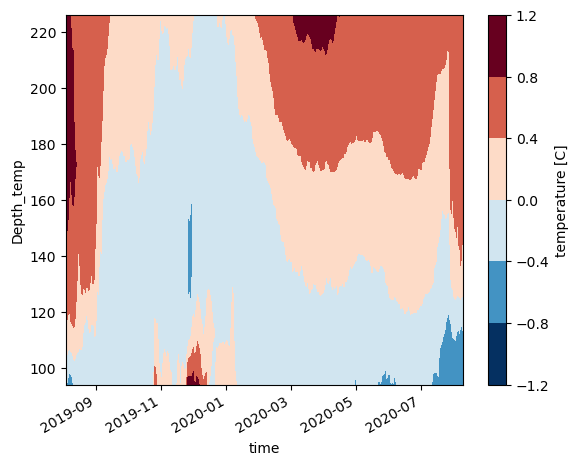

In [25]:
sbe_merged.temperature.plot.contourf()

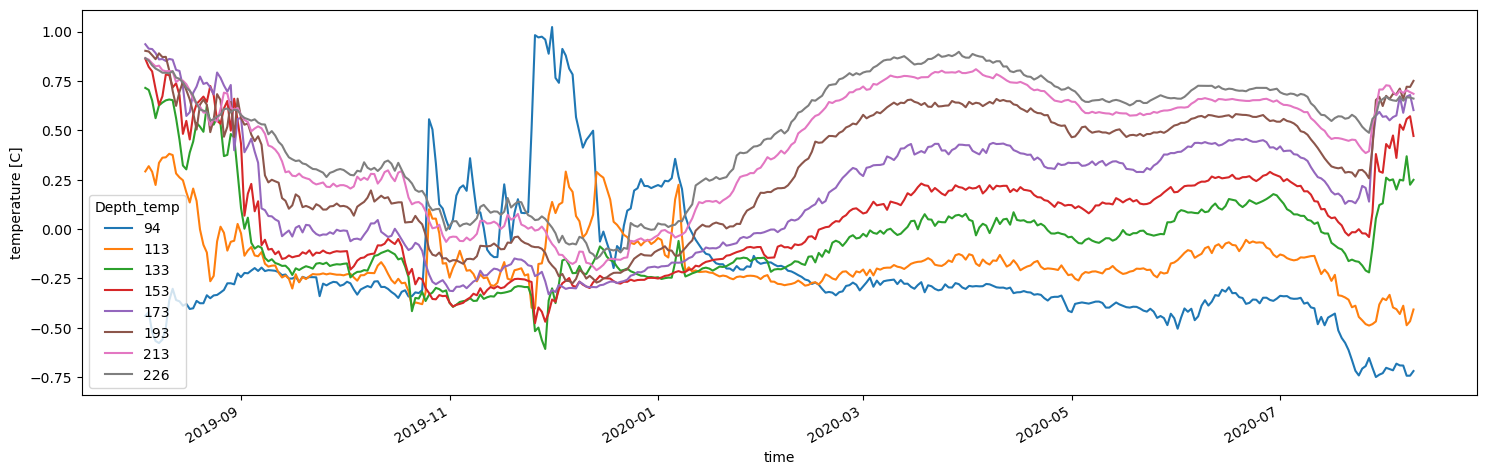

In [26]:
# look at temp plot
temp = sbe_merged['temperature']
temp.plot.line(x="time", figsize = (18,5));

In [ ]:
sbe_merged.temperature[7].plot()

## Add attributes daily

In [27]:
# Rink 2019
# file_id = 'OMG_Narwhals_Mooring_Rink_1D_L3'
# uuid = '906a0f5c-14dd-11ec-82a8-0242ac130003'
# filename = 'OMG_Narwhals_Mooring_Rink_1D_L3.nc'
# title = 'OMG Narwhals Rink mooring Level 3 data'
# sbe37_1 = 'OMG_Narwhals_Mooring_CTD_L2_2019080503716788.nc'
# sbe37_2 = 'sbe37sm-rs232_03716789_2019_08_05.nc'

# # # Fisher Islands 2020
# file_id = 'OMG_Narwhals_Mooring_Fisher_1D_L3'
# uuid = '37f9a45c-726d-11ec-90d6-0242ac120003'
# filename = 'OMG_Narwhals_Mooring_Fisher_1D_L3.nc'
# title = 'OMG Narwhals Fisher Islands mooring Level 3 data'

# # Kong Oscar 2019
# file_id = 'OMG_Narwhals_Mooring_KongOscar2019_1D_L3'
# uuid = '906a1010-14dd-11ec-82a8-0242ac130003'
# filename = 'OMG_Narwhals_Mooring_KongOscar2019_1D_L3.nc'
# title = 'OMG Narwhals Kong Oscar 2019 mooring Level 3 data'
# sbe37_1 = 'sbe37sm-rs232_03716754_2019_08_04.nc'
# sbe37_2 = 'sbe37sm-rs232_03716526_2019_08_04.nc'

# Kong Oscar 2020
file_id = 'OMG_Narwhals_Mooring_KongOscar2020_1D_L3'
uuid = '37f9a56a-726d-11ec-90d6-0242ac120003'
filename = 'OMG_Narwhals_Mooring_KongOscar2020_1D_L3.nc'
title = 'OMG Narwhals Kong Oscar 2020 mooring Level 3 data'

# # Sverdrup
# file_id = 'OMG_Narwhals_Mooring_Sverdrup_1D_L3'
# uuid = '906a11dc-14dd-11ec-82a8-0242ac130003'
# filename = 'OMG_Narwhals_Mooring_Sverdrup_1D_L3.nc'
# title = 'OMG Narwhals Sverdrup mooring Level 3 data'
# sbe37_1 = 'OMG_Narwhals_Mooring_CTD_L2_2019080303716787.nc'
# sbe37_2 = 'OMG_Narwhals_Mooring_CTD_L2_2019080303716790.nc'

netcdf_filename = file_id + '.nc'

In [28]:
## clear copied attributes from merge
sbe_merged.attrs = ''
## copy attributes from previous netCDF
sbe_merged.attrs = sbe56_1_ds.attrs

## add attributes to dataset
sbe_merged.attrs['title'] = title
sbe_merged.attrs['id'] = file_id
sbe_merged.attrs['uuid'] = uuid
sbe_merged.attrs['summary'] = 'This file contains daily-averaged conductivity, temperature, and depth measurements from CTD and temperature logger instruments attached to the same mooring. This dataset was collected by the Oceans Melting Greenland (OMG) Narwhals program that will provide subannual hydrographic variability measurements in three northwest Greenland fjords. Between July 2018 to July 2020, three bottom-mounted moorings with a suite of instrumentation were deployed year-round in three glacial fjord sites in Melville Bay, West Greenland: Sverdrup Glacier, Kong Oscar Glacier, and Fisher Islands/Rink Glacier. Examination of water properties at these sites will demonstrate the presence and potential seasonality of warm, salty Atlantic Water intrusion into these marine-terminating glaciers. Additonally, during summer cruises where moorings were deployed and/or recovered, a CTD was lowered into the water to obtain full water column profiles at various locations near the glacier fronts and offshore.'
sbe_merged.attrs['source'] = 'Temperature and salinity data were collected using Conductivity Temperature Depth (CTD) and temperature logger instruments purchased from Sea-Bird Electronics, Inc. that were attached to the same mooring.'
sbe_merged.attrs['filename'] = filename
sbe_merged.attrs['processing_level'] = 'L3'
## remove uneeded attrs
sbe_merged.attrs.pop('serial_number')
sbe_merged.attrs.pop('device_type')
sbe_merged.attrs.pop('target_sensor_depth')
sbe_merged.attrs.pop('actual_sensor_depth')
sbe_merged.attrs.pop('sample_interval')

'20 seconds'

In [ ]:
sbe_merged

## Add attributes hourly

In [ ]:
# # Rink 2019
# file_id = 'OMG_Narwhals_Mooring_Rink_1H_L3'
# uuid = '37f9a678-726d-11ec-90d6-0242ac120003'
# filename = 'OMG_Narwhals_Mooring_Rink_1H_L3.nc'
# title = 'OMG Narwhals Rink mooring Level 3 data'
# sbe37_1 = 'OMG_Narwhals_Mooring_CTD_L2_2019080503716788.nc'
# sbe37_2 = 'sbe37sm-rs232_03716789_2019_08_05.nc'

# # Fisher Islands 2020
file_id = 'OMG_Narwhals_Mooring_Fisher_1H_L3'
uuid = '37f9a9e8-726d-11ec-90d6-0242ac120003'
filename = 'OMG_Narwhals_Mooring_Fisher_1H_L3.nc'
title = 'OMG Narwhals Fisher Islands mooring Level 3 data'

# # Kong Oscar 2019
# file_id = 'OMG_Narwhals_Mooring_KongOscar2019_1H_L3'
# uuid = '37f9ab00-726d-11ec-90d6-0242ac120003'
# filename = 'OMG_Narwhals_Mooring_KongOscar2019_1H_L3.nc'
# title = 'OMG Narwhals Kong Oscar 2019 mooring Level 3 data'
# sbe37_1 = 'sbe37sm-rs232_03716754_2019_08_04.nc'
# sbe37_2 = 'sbe37sm-rs232_03716526_2019_08_04.nc'

# # Kong Oscar 2020
# file_id = 'OMG_Narwhals_Mooring_KongOscar2020_1H_L3'
# uuid = '37f9ac18-726d-11ec-90d6-0242ac120003'
# filename = 'OMG_Narwhals_Mooring_KongOscar2020_1H_L3.nc'
# title = 'OMG Narwhals Kong Oscar 2020 mooring Level 3 data'

# # Sverdrup
# file_id = 'OMG_Narwhals_Mooring_Sverdrup_1H_L3'
# uuid = '37f9ad30-726d-11ec-90d6-0242ac120003'
# filename = 'OMG_Narwhals_Mooring_Sverdrup_1H_L3.nc'
# title = 'OMG Narwhals Sverdrup mooring Level 3 data'
# sbe37_1 = 'OMG_Narwhals_Mooring_CTD_L2_2019080303716787.nc'
# sbe37_2 = 'OMG_Narwhals_Mooring_CTD_L2_2019080303716790.nc'

netcdf_filename = file_id + '.nc'

In [ ]:
## clear copied attributes from merge
sbe_merged.attrs = ''
## copy attributes from previous netCDF
sbe_merged.attrs = sbe56_1_ds.attrs

## add attributes to dataset
sbe_merged.attrs['title'] = title
sbe_merged.attrs['id'] = file_id
sbe_merged.attrs['uuid'] = uuid
sbe_merged.attrs['summary'] = 'This file contains hourly-averaged conductivity, temperature, and depth measurements from CTD and temperature logger instruments attached to the same mooring. This dataset was collected by the Oceans Melting Greenland (OMG) Narwhals program that will provide subannual hydrographic variability measurements in three northwest Greenland fjords. Between July 2018 to July 2020, three bottom-mounted moorings with a suite of instrumentation were deployed year-round in three glacial fjord sites in Melville Bay, West Greenland: Sverdrup Glacier, Kong Oscar Glacier, and Fisher Islands/Rink Glacier. Examination of water properties at these sites will demonstrate the presence and potential seasonality of warm, salty Atlantic Water intrusion into these marine-terminating glaciers. Additonally, during summer cruises where moorings were deployed and/or recovered, a CTD was lowered into the water to obtain full water column profiles at various locations near the glacier fronts and offshore.'
sbe_merged.attrs['source'] = 'Temperature and salinity data were collected using Conductivity Temperature Depth (CTD) and temperature logger instruments purchased from Sea-Bird Electronics, Inc. that were attached to the same mooring.'
sbe_merged.attrs['filename'] = filename
sbe_merged.attrs['processing_level'] = 'L3'
## remove uneeded attrs
sbe_merged.attrs.pop('serial_number')
sbe_merged.attrs.pop('device_type')
sbe_merged.attrs.pop('target_sensor_depth')
sbe_merged.attrs.pop('actual_sensor_depth')
sbe_merged.attrs.pop('sample_interval')

## Create NetCDF variable encoding (required to save the time values properly)

In [29]:
new_encoding = omgL3_funs.create_encoding(sbe_merged)
print(new_encoding)

{'conductivity': {'zlib': True, 'complevel': 5, 'shuffle': True, '_FillValue': 9.969209968386869e+36}, 'density': {'zlib': True, 'complevel': 5, 'shuffle': True, '_FillValue': 9.969209968386869e+36}, 'potential_temperature': {'zlib': True, 'complevel': 5, 'shuffle': True, '_FillValue': 9.969209968386869e+36}, 'pressure': {'zlib': True, 'complevel': 5, 'shuffle': True, '_FillValue': 9.969209968386869e+36}, 'salinity': {'zlib': True, 'complevel': 5, 'shuffle': True, '_FillValue': 9.969209968386869e+36}, 'temperature': {'zlib': True, 'complevel': 5, 'shuffle': True, '_FillValue': 9.969209968386869e+36}, 'time': {'_FillValue': None, 'dtype': 'int32'}, 'Depth_CTD': {'_FillValue': None, 'dtype': 'int32'}, 'SN_CTD': {'_FillValue': None}, 'Depth_temp': {'_FillValue': None, 'dtype': 'int32'}, 'SN_temp': {'_FillValue': None}}


## Save xarray DataSet object as netcdf

In [30]:
# output_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019') # 2019
output_dir = Path('C:/Users/marie/Documents/PhD/Chapter_3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3') # 2020
netcdf_filename = Path(filename)
sbe_merged.to_netcdf(output_dir / netcdf_filename,encoding=new_encoding)
# sbe_merged.close()

## Check the file

In [ ]:
tmp = xr.open_dataset(output_dir / netcdf_filename)
tmp.close()

In [ ]:
# tmp.temperature[1]
print(tmp)